<a href="https://colab.research.google.com/github/timothy-87/Group-1-Tasks/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_excel('/content/Students Performance.xlsx', sheet_name = None)
df
#understand the data
## Student test results data
#Objectives
## Student performance across various categories
## Factors influencing student performance

{'Group A':     gender race/ethnicity parental level of education         lunch  \
 0     male        group A          associate's degree  free/reduced   
 1     male        group A                some college      standard   
 2   female        group A             master's degree      standard   
 3     male        group A             master's degree  free/reduced   
 4   female        group A          associate's degree      standard   
 ..     ...            ...                         ...           ...   
 84  female        group A                some college      standard   
 85  female        group A                some college      standard   
 86    male        group A                 high school      standard   
 87  female        group A            some high school  free/reduced   
 88    male        group A                 high school      standard   
 
    test preparation course  math score  reading score  writing score  
 0                     none          47            

# Observations
## The students performed best in reading with a mean of 69.169 and poorest in maths with a mean of 66.089.

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


Text(0.5, 1.0, 'Average Scores per Subject')

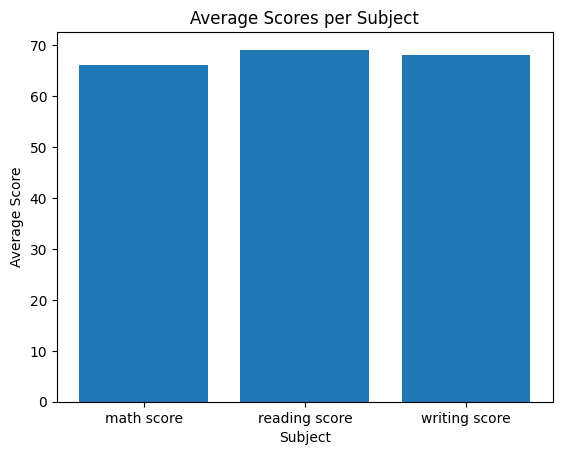

In [66]:
#Objective 1 student across various categories
# Student performance by subject
Group_a = df['Group A']
Group_b = df['Group B']
Group_c = df['Group C']
Group_d = df['Group D']
Group_e = df['Group E']
combined = pd.concat([Group_a, Group_b, Group_c, Group_d, Group_e], ignore_index = True)
subjects = ['math score', 'reading score', 'writing score']
average_scores_subject = combined[['math score', 'reading score', 'writing score']].mean()
print(average_scores_subject)
plt.bar(subjects, average_scores_subject)
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.title('Average Scores per Subject')


# Observations
## The male students performed better in Maths while the Female students performed better in reading and writing as shown in the visual below.

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Axes: xlabel='gender'>

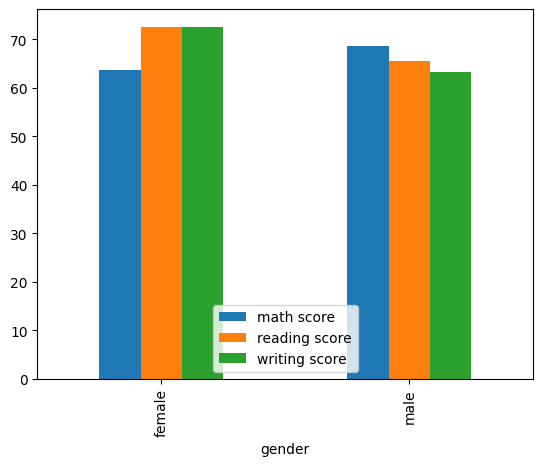

In [64]:
# Student performance by gender

average_scores_gender = combined.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_gender)

average_scores_gender.plot(kind = 'bar')

# Observations
## Group E had the highest average score across all three subjects while Group A had the lowest average scores across all three subjects.

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<Axes: xlabel='race/ethnicity'>

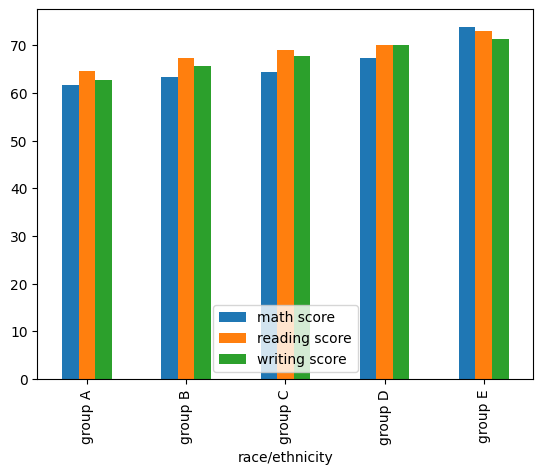

In [65]:
# Student performance by race
average_scores_race = combined.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_race)
average_scores_race.plot(kind = 'bar')

In [ ]:
#Objective 2
## Does parental level of education affect performance & to what effect
## Does Lunch package affect performance & to what effect
## Does test preparation affect performance & to what effect